<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/Assignment1/MLAssignment1Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [6]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Read in file

In [3]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('bank-additional-full.csv', sep=';', delimiter=None, header='infer', names=None, index_col=None)

Saving bank-additional-full.csv to bank-additional-full.csv


In [4]:
sns.set_style('dark')
import matplotlib as mpl
mpl.style.use(['https://gist.githubusercontent.com/BrendanMartin/01e71bb9550774e2ccff3af7574c0020/raw/6fa9681c7d0232d34c9271de9be150e584e606fe/lds_default.mplstyle'])
mpl.rcParams.update({"figure.figsize": (8,6), "axes.titlepad": 22.0})

Data Exploration

Target variables  :  0        1
1        1
2        1
3        1
4        1
        ..
41183    2
41184    1
41185    1
41186    2
41187    1
Name: target, Length: 41188, dtype: int64
Unique values of the target variable [1 2]
Counts of the target variable : [36548  4640]


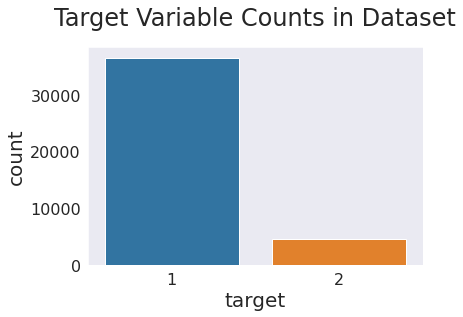

In [16]:
dataset.rename(columns = {'y':'target'}, inplace = True)

print('Target variables  : ', dataset['target'])
(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

sns.countplot(data = dataset,x = 'target')
plt.title('Target Variable Counts in Dataset')
plt.show()

Turn categories to numerical

In [17]:
dataset['target'] = pd.factorize(dataset['target'])[0] + 1
dataset['job'] = pd.factorize(dataset['job'])[0] + 1
dataset['marital'] = pd.factorize(dataset['marital'])[0] + 1
dataset['education'] = pd.factorize(dataset['education'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['housing'] = pd.factorize(dataset['housing'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['loan'] = pd.factorize(dataset['loan'])[0] + 1
dataset['contact'] = pd.factorize(dataset['contact'])[0] + 1
dataset['month'] = pd.factorize(dataset['month'])[0] + 1
dataset['day_of_week'] = pd.factorize(dataset['day_of_week'])[0] + 1
dataset['poutcome'] = pd.factorize(dataset['contact'])[0] + 1

# Should remove - duration as only for benchmark
dataset = dataset.drop('duration', 1)

In [18]:
seed = 5
np.random.seed(seed)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
# X = dataset.drop("target",1)   #Feature Matrix
X = dataset.iloc[:,0:8]
y = dataset["target"]          #Target Variable

print(X.head())
print(Y.head())

   age  job  marital  education  default  housing  loan  contact
0   56    1        1          1        1        1     1        1
1   57    2        1          2        2        1     1        1
2   37    2        1          2        1        2     1        1
3   40    3        1          3        1        1     1        1
4   56    2        1          2        1        1     2        1
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


Standardize

In [27]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
# We iterate over 100 epochs to train the model. An epoch is an iteration over the entire data set.
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

eval_model=classifier.evaluate(X_train, y_train)
eval_model

Epoch 1/100
2884/2884 [==============================] - 7s 2ms/step - loss: -13.5743 - accuracy: 0.8864
Epoch 2/100
2884/2884 [==============================] - 6s 2ms/step - loss: -155.5860 - accuracy: 0.8866
Epoch 3/100
2884/2884 [==============================] - 5s 2ms/step - loss: -531.9291 - accuracy: 0.8866
Epoch 4/100
2884/2884 [==============================] - 5s 2ms/step - loss: -1210.1111 - accuracy: 0.8866
Epoch 5/100
2884/2884 [==============================] - 5s 2ms/step - loss: -2258.8640 - accuracy: 0.8866
Epoch 6/100
2884/2884 [==============================] - 5s 2ms/step - loss: -3737.9644 - accuracy: 0.8866
Epoch 7/100
2884/2884 [==============================] - 6s 2ms/step - loss: -5721.8394 - accuracy: 0.8866
Epoch 8/100
2884/2884 [==============================] - 6s 2ms/step - loss: -8264.9336 - accuracy: 0.8866
Epoch 9/100
2884/2884 [==============================] - 9s 3ms/step - loss: -11468.9727 - accuracy: 0.8866
Epoch 10/100
2884/2884 [================

[-11204865.0, 0.8865804076194763]

Evaluate

In [30]:
# Predict the output for our test dataset. 
# If the prediction is greater than 0.5 then the output is 1 else the output is 0
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10987     0]
 [ 1370     0]]


Visualizing Neural Networks

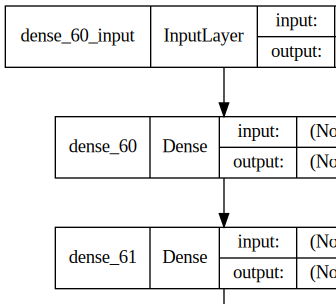

In [39]:
from IPython.display import SVG
import tensorflow as tf
from keras.utils.vis_utils import plot_model

SVG(model_to_dot(classifier, show_shapes=True).create(prog="dot", format="svg"))